In [16]:
#test construction of the Hamiltonian

include("../src/Atoms.jl")
include("../src/scfOptions.jl")
include("../src/anderson_mix.jl")
include("../src/kerker_mix.jl")
include("../src/Ham.jl")
include("../src/hartree_pot_bc.jl")
include("../src/pseudocharge.jl")
include("../src/getocc.jl")


dx = 0.25;
Nunit = 8;
Lat = 10;
# using the default values in Lin's code
YukawaK = 0.0100
n_extra = 10; # QUESTION: I don't know where this comes from
epsil0 = 10.0;
T_elec = 100.0;

kb = 3.1668e-6;
au2K = 315774.67;
Tbeta = au2K / T_elec;

betamix = 0.5;
mixdim = 10;

Ndist  = 1;   # Temporary variable
Natoms = round(Integer, Nunit / Ndist); # number of atoms

R = zeros(Natoms, 1); # this is defined as an 2D array
for j = 1:Natoms
  R[j] = (j-0.5)*Lat*Ndist+dx;
end

sigma  = ones(Natoms,1)*(2.0);  # insulator
omega  = ones(Natoms,1)*0.03;
Eqdist = ones(Natoms,1)*10.0;
mass   = ones(Natoms,1)*42000.0;
nocc   = ones(Natoms,1);          # number of electrons per atom
Z      = nocc;

# creating an atom structure
atoms = Atoms(Natoms, R, sigma,  omega,  Eqdist, mass, Z, nocc);

# allocating a Hamiltonian
ham = Ham(Lat, Nunit, n_extra, dx, atoms,YukawaK, epsil0, Tbeta)

# total number of occupied orbitals
Nocc = round(Integer, sum(atoms.nocc) / ham.nspin);

# initialize the potentials within the Hemiltonian, setting H[\rho_0]
init_pot_high!(ham, Nocc)

# we use the anderson mixing of the potential
mixOpts = andersonMixOptions(ham.Ns, betamix, mixdim )

# we use the default options
eigOpts = eigOptions();

scfOpts = scfOptions(eigOpts, mixOpts)

# running the scf iteration
@time VtoterrHist = scf_high!(ham, scfOpts)

  2.202516 seconds (1.95 M allocations: 611.019 MiB, 4.20% gc time)


16-element Array{Float64,1}:
 6.79714e15 
 1.40756    
 0.780952   
 1.02638    
 0.103014   
 0.0189887  
 0.0133416  
 0.00257108 
 0.00256484 
 0.00225882 
 0.000388902
 0.00031894 
 0.000217834
 5.39533e-6 
 1.90363e-6 
 8.35727e-8 

In [17]:
using PyPlot
rho1 = ham.rho;

In [18]:
dx = 0.25;
Nunit = 8;
Lat = 10;
# using the default values in Lin's code
YukawaK = 0.0100
n_extra = 10; # QUESTION: I don't know where this comes from
epsil0 = 10.0;
T_elec = 100.0;

kb = 3.1668e-6;
au2K = 315774.67;
Tbeta = au2K / T_elec;

betamix = 0.5;
mixdim = 10;

Ndist  = 1;   # Temporary variable
Natoms = round(Integer, Nunit / Ndist); # number of atoms

R = zeros(Natoms, 1); # this is defined as an 2D array
for j = 1:Natoms
  R[j] = (j-0.5)*Lat*Ndist+dx;
end

sigma  = ones(Natoms,1)*(2.0);  # insulator
omega  = ones(Natoms,1)*0.03;
Eqdist = ones(Natoms,1)*10.0;
mass   = ones(Natoms,1)*42000.0;
nocc   = ones(Natoms,1);          # number of electrons per atom
Z      = nocc;

# creating an atom structure
atoms = Atoms(Natoms, R, sigma,  omega,  Eqdist, mass, Z, nocc);

# allocating a Hamiltonian
ham = Ham(Lat, Nunit, n_extra, dx, atoms,YukawaK, epsil0, Tbeta)

# total number of occupied orbitals
Nocc = round(Integer, sum(atoms.nocc) / ham.nspin);

# initialize the potentials within the Hemiltonian, setting H[\rho_0]
init_pot!(ham, Nocc)

# we use the anderson mixing of the potential
mixOpts = andersonMixOptions(ham.Ns, betamix, mixdim )

# we use the default options
eigOpts = eigOptions();

scfOpts = scfOptions(eigOpts, mixOpts)

# running the scf iteration
@time VtoterrHist = scf!(ham, scfOpts)

  2.462612 seconds (2.66 M allocations: 719.468 MiB, 4.40% gc time)


24-element Array{Float64,1}:
 6.6333e15 
 1.57348   
 0.951793  
 0.428217  
 0.32344   
 9.63229   
 0.0513616 
 0.0439822 
 0.023395  
 0.0146026 
 0.00934094
 0.0306141 
 0.0230578 
 0.0247922 
 0.00434864
 0.0029576 
 0.00351384
 1.12803e-5
 8.17506e-6
 2.50993e-6
 2.32002e-6
 1.07443e-6
 1.68483e-7
 6.26053e-9

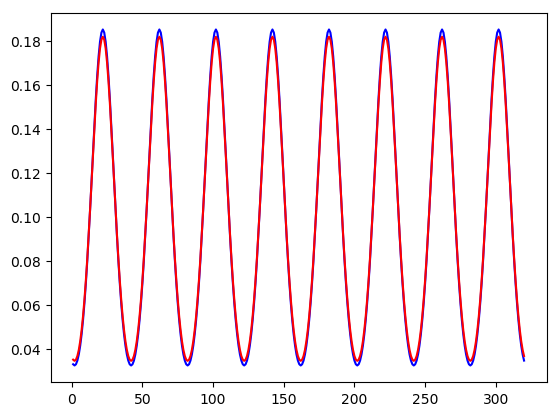

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13777fb90>
 PyObject <matplotlib.lines.Line2D object at 0x13777fc90>

In [21]:
rho2=ham.rho;
plot(1:ham.Ns,rho1,"b-",1:ham.Ns,rho2,"r-")